**Explicação das colunas**

ID -> Número do cliente	

CODE_GENDER	-> Gênero	

FLAG_OWN_CAR ->Tem um carro	

FLAG_OWN_REALTY	-> Existe uma propriedade	

CNT_CHILDREN -> Número de filhos

AMT_INCOME_TOTAL -> Renda anual	

NAME_INCOME_TYPE -> Categoria de renda	

NAME_EDUCATION_TYPE	-> Nível de escolaridade

NAME_FAMILY_STATUS -> Estado civil	

NAME_HOUSING_TYPE -> Modo de vida	

DAYS_BIRTH	-> Aniversário	Contagem regressiva a partir do dia atual (0), -1 significa ontem

DAYS_EMPLOYED ->Data de início do emprego	Contagem regressiva a partir do dia atual (0). Se positivo, significa que a pessoa está atualmente desempregada.

FLAG_MOBIL -> Existe um telefone celular? (1) para sim e (0) para não

FLAG_WORK_PHONE	-> Existe um telefone comercial? (1) para sim e (0) para não

FLAG_PHONE -> Tem algum telefone?	(1) para sim e (0) para não

FLAG_EMAIL -> Existe um e-mail	(1) para sim e (0) para não

OCCUPATION_TYPE	-> Ocupação	

CNT_FAM_MEMBERS	-> Tamanho da família	



**Importações**

In [13]:
#libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [14]:
#arquivo 
df = pd.read_csv('C:\\Users\\souza\\Downloads\\projeto credito\\data\\credit_data_tratada.csv')
df = df.drop('OCCUPATION_TYPE', axis=1)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,OCCUPATION_TREATED,MONTHS_BALANCE,STATUS
0,5008804,M,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,not informed,0,C
1,5008804,M,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,not informed,-1,C
2,5008804,M,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,not informed,-2,C
3,5008804,M,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,not informed,-3,C
4,5008804,M,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,not informed,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46766,5021627,F,True,True,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21918,365243,1,0,0,1,1.0,not informed,-5,C
46767,5021627,F,True,True,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21918,365243,1,0,0,1,1.0,not informed,-6,C
46768,5021627,F,True,True,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21918,365243,1,0,0,1,1.0,not informed,-7,C
46769,5021627,F,True,True,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21918,365243,1,0,0,1,1.0,not informed,-8,C


**Estatistica Descritiva**

In [15]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,4.677100e+04,46771.000000,4.677100e+04,46771.000000,46771.000000,46771.0,46771.000000,46771.000000,46771.000000,46771.000000,46771.000000
mean,5.013654e+06,0.364756,2.030891e+05,-16178.919694,52743.886425,1.0,0.218084,0.332556,0.176562,2.196404,-19.047508
std,1.328729e+04,0.674646,1.209869e+05,4003.374600,131948.555268,0.0,0.412949,0.471134,0.381302,0.825609,13.814047
min,5.008804e+06,0.000000,3.330000e+04,-23768.000000,-10936.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.009537e+06,0.000000,1.350000e+05,-19702.000000,-3661.000000,1.0,0.000000,0.000000,0.000000,2.000000,-28.000000
50%,5.010215e+06,0.000000,1.800000e+05,-15737.000000,-1858.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.010916e+06,1.000000,2.700000e+05,-12859.000000,-586.000000,1.0,0.000000,1.000000,0.000000,2.000000,-7.000000
max,5.113230e+06,4.000000,1.350000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,6.000000,0.000000


In [16]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
OCCUPATION_TREATED     0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [17]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR              bool
FLAG_OWN_REALTY           bool
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS        float64
OCCUPATION_TREATED      object
MONTHS_BALANCE           int64
STATUS                  object
dtype: object

In [18]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [19]:
df['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [20]:
df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [21]:
df['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

**Analise Multivariada**

In [22]:
num_col = df.select_dtypes(exclude='object')
cat_col = df.select_dtypes(exclude='number').columns


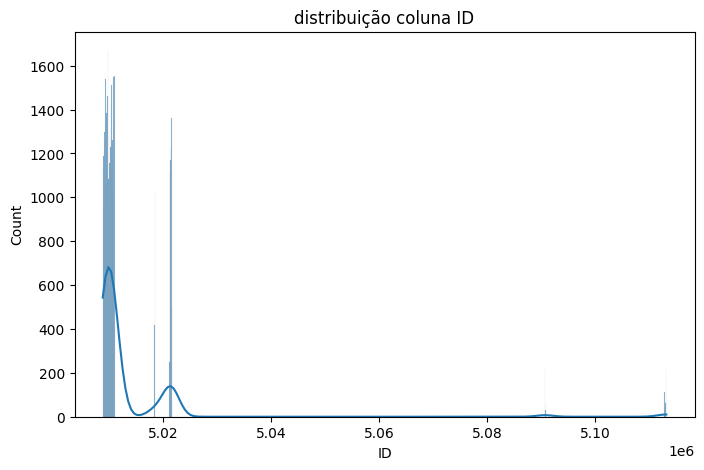

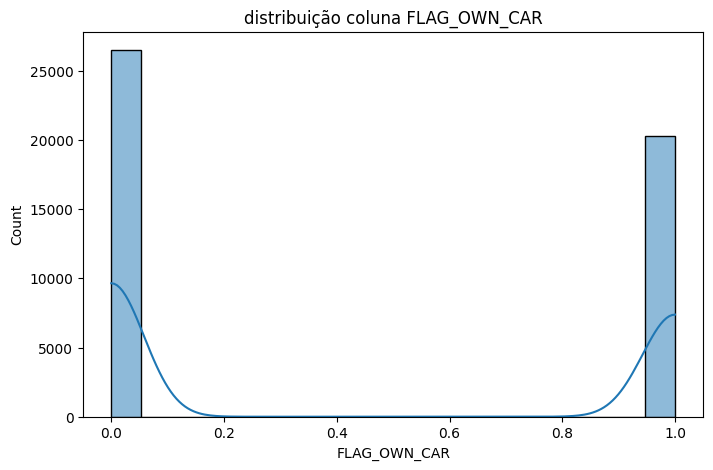

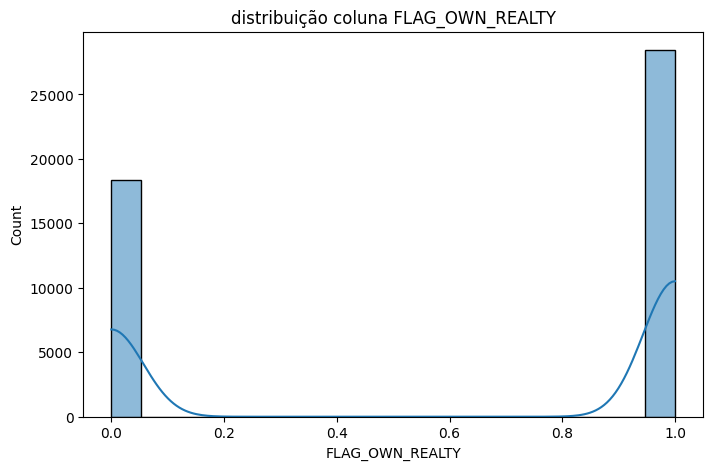

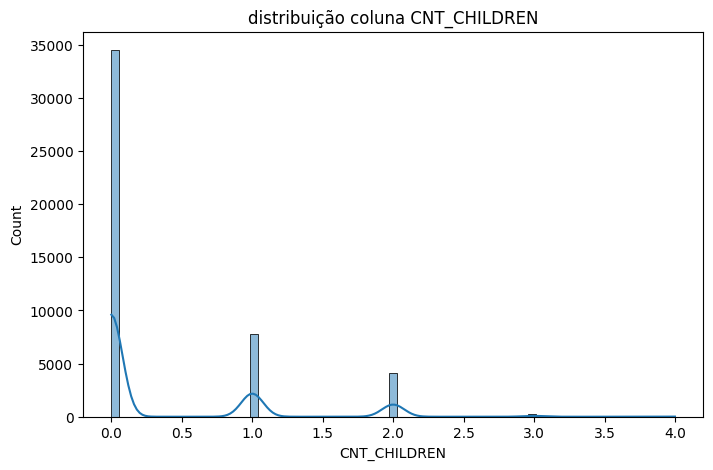

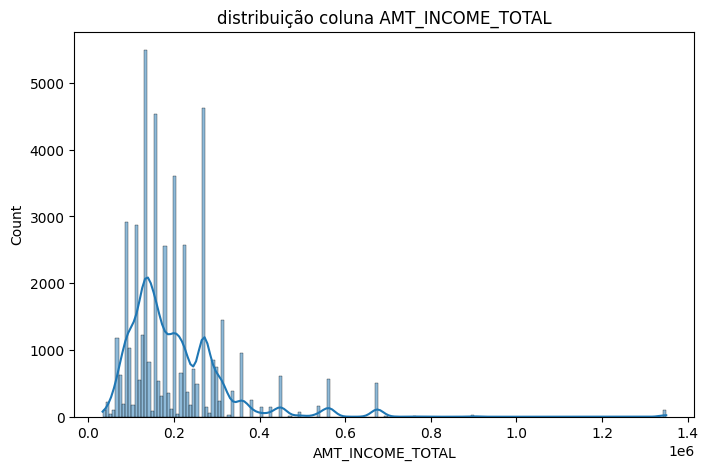

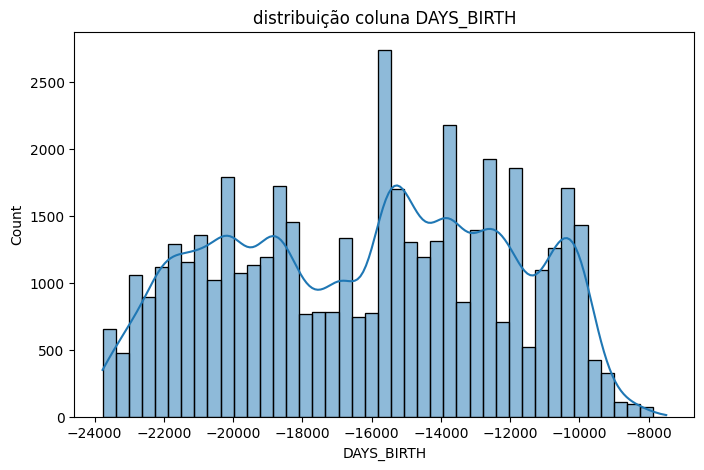

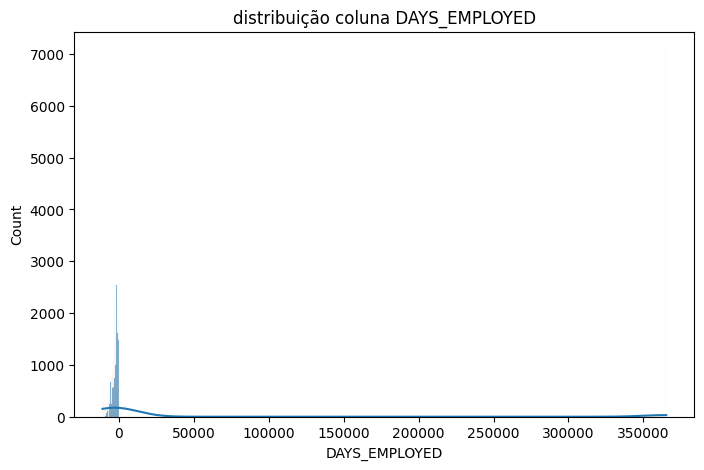

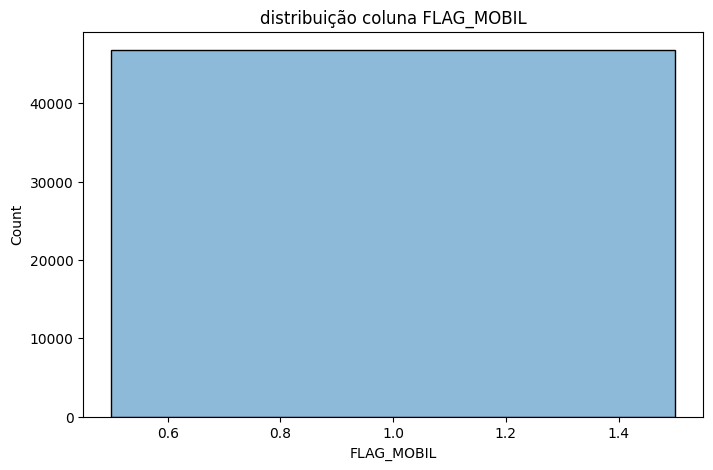

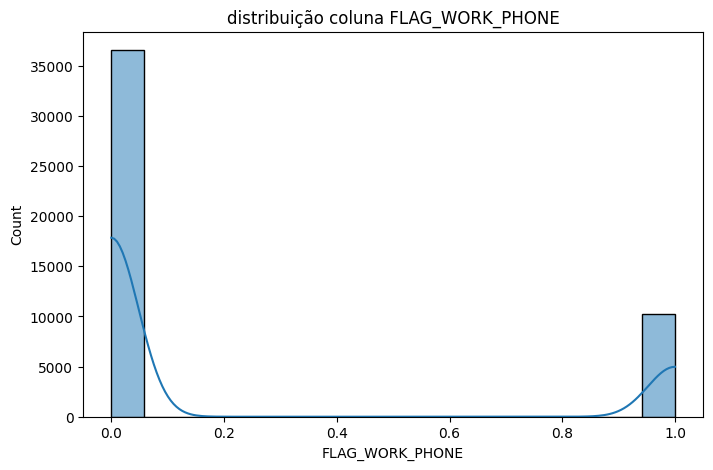

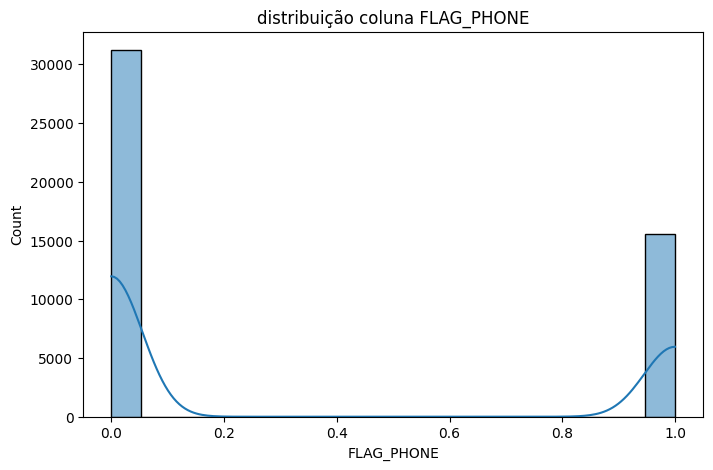

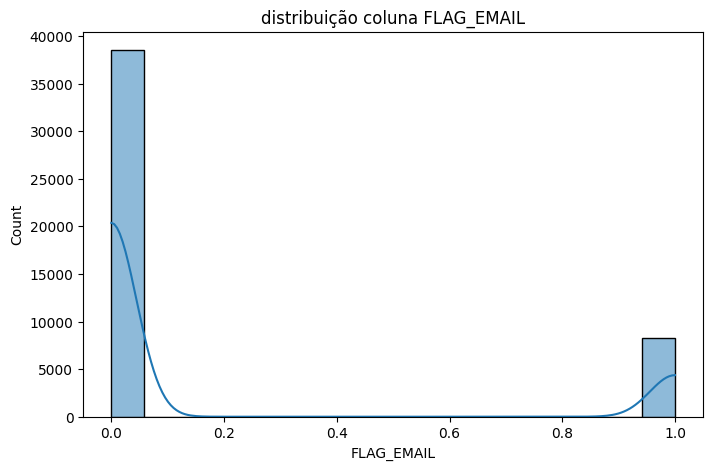

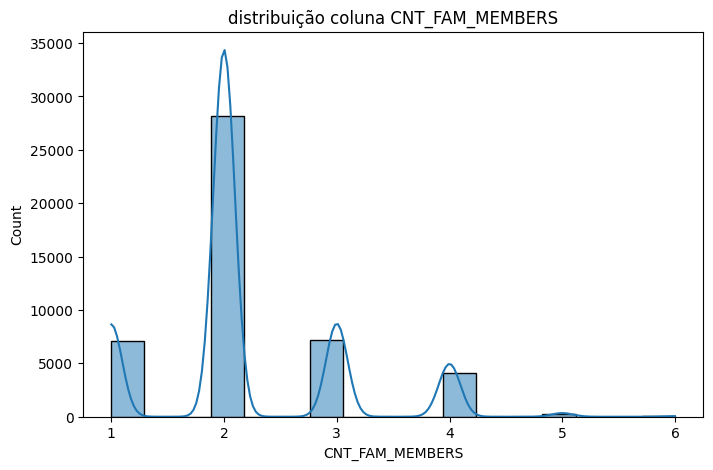

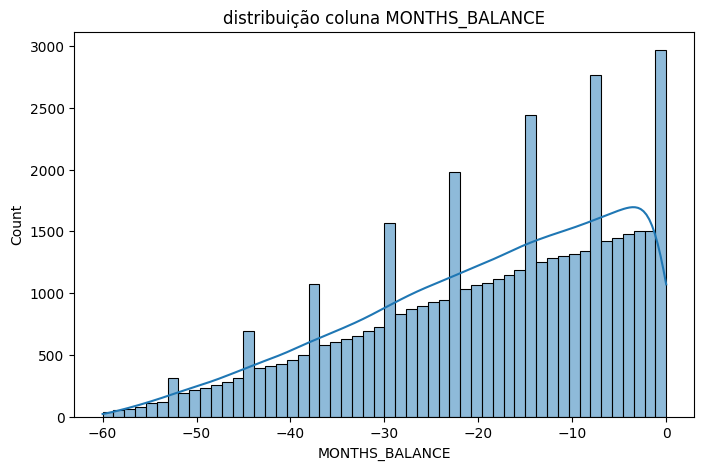

In [23]:
#plotando histogramas 
for i, num in enumerate(num_col):
    plt.figure(figsize=(8,5))
    plt.title(f'distribuição coluna {num}')
    sns.histplot(df[num], kde=True)


In [24]:
# #distribuiçao colunas categoricas 
# for i, cat in enumerate(cat_col):
#     sns.countplot(df[cat])
